# Prepare data

In [8]:
import pandas as pd


DAILY_STOCKS_RETURNS_PATH = ("./../data/stocks_data.xlsx")

df = pd.read_excel(DAILY_STOCKS_RETURNS_PATH, sheet_name="Returns", index_col=2, header=6)
df = df.iloc[:, 3:].T
df.to_pickle('./../data/stocks_data.pkl')

In [2]:
import pandas as pd

from model.score_investment_daily import Preprocessing


predicted_tweets = pd.read_csv('./../data/new_webscrapping_predicted/concatenated_prediction.csv')
stocks_data = pd.read_pickle('./../data/stocks_data.pkl')

ap = Preprocessing()
predicted_tweets_processed, stocks_data_processed = ap.process(predicted_tweets, stocks_data)


/var/folders/9t/_dbsg1912_q5_0l71jrhnvlr0000gn/T/ipykernel_88397/1728020502.py:6: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  predicted_tweets = pd.read_csv('./../data/new_webscrapping_predicted/concatenated_prediction.csv')


In [3]:
predicted_tweets_processed

,year,month,day,company,positive_ratio,yearmonthday
0,2011,5,14,TOTALENERGIES SE,0.000000,2011-05-14
1,2011,6,17,TOTALENERGIES SE,0.500000,2011-06-17
2,2011,8,17,TOTALENERGIES SE,0.500000,2011-08-17
3,2011,9,15,TOTALENERGIES SE,0.500000,2011-09-15
4,2011,10,20,TOTALENERGIES SE,0.500000,2011-10-20
...,...,...,...,...,...,...
10642,2024,4,26,TOTALENERGIES SE,0.459350,2024-04-26
10643,2024,4,27,TOTALENERGIES SE,0.435449,2024-04-27
10644,2024,4,28,TOTALENERGIES SE,0.530303,2024-04-28
10645,2024,4,29,TOTALENERGIES SE,0.498282,2024-04-29


In [11]:
aggregated_data = predicted_tweets_processed.groupby(['month', 'year', 'day'])[['sentiment', 'sentiment_base']].mean()

In [12]:
aggregated_data.reset_index(inplace=True)
aggregated_data['date'] = pd.to_datetime(aggregated_data[['year', 'month', 'day']])

<Axes: xlabel='date', ylabel='sentiment'>

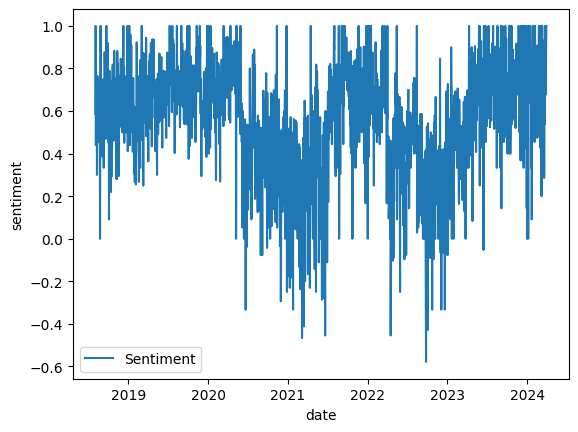

In [13]:
import seaborn as sns


sns.lineplot(data=aggregated_data, x='date', y='sentiment', label='Sentiment')

In [15]:
aggregated_data['moving_sentiment'] = aggregated_data['sentiment'].rolling(window=20).mean()

In [17]:
aggregated_data

,month,year,day,sentiment,sentiment_base,date,moving_sentiment
0,1,2019,1,0.846154,0.076923,2019-01-01,NaN
1,1,2019,2,0.565217,0.043478,2019-01-02,NaN
2,1,2019,3,0.875000,0.000000,2019-01-03,NaN
3,1,2019,4,0.789474,0.210526,2019-01-04,NaN
4,1,2019,5,1.000000,0.000000,2019-01-05,NaN
...,...,...,...,...,...,...,...
2060,12,2023,27,0.714286,0.000000,2023-12-27,0.755289
2061,12,2023,28,0.777778,0.000000,2023-12-28,0.751871
2062,12,2023,29,1.000000,0.500000,2023-12-29,0.783450
2063,12,2023,30,0.142857,0.000000,2023-12-30,0.740592


<Axes: xlabel='date', ylabel='moving_sentiment'>

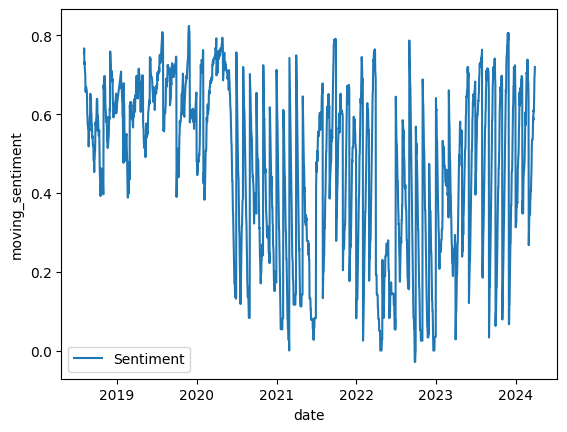

In [32]:
import seaborn as sns


sns.lineplot(data=aggregated_data, x='date', y='moving_sentiment', label='Sentiment')

In [2]:
import pandas as pd

from model.score_investment_daily import Preprocessing


WEBSCRAPPED_DATA_PATH = (
    "./../data/new_webscrapping_predicted/concatenated_prediction.csv"
)
DAILY_STOCKS_RETURNS_PATH = "./../data/stocks_daily_data.xlsx"
analysed_tweets = pd.read_csv(WEBSCRAPPED_DATA_PATH)
df_returns = pd.read_excel(DAILY_STOCKS_RETURNS_PATH, index_col=0)

pp = Preprocessing()
grouped_analysed_tweets, df_returns = pp.process(analysed_tweets, df_returns)


/var/folders/9t/_dbsg1912_q5_0l71jrhnvlr0000gn/T/ipykernel_77788/2454097294.py:10: DtypeWarning: Columns (4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  analysed_tweets = pd.read_csv(WEBSCRAPPED_DATA_PATH)


In [40]:
import pandas as pd


df_bp_plc_1 = pd.read_csv('./../data/new_webscrapping/webscraped_totalenergies_se.csv')
df_bp_plc_2 = pd.read_csv('./../data/webscraped_data/webscraped_TOTALENERGIES_SE.csv')

df_bp = pd.concat([df_bp_plc_1, df_bp_plc_2], ignore_index=True)
df_bp.to_csv('./../data/webscrapped/raw/twitter/webscraped_totalenergies_se.csv', index=False)

In [41]:
df_bp.shape

(191294, 8)